This notebook is my first End-to-End Machine Learning project. The journey to self learning has been one worth the intellectual relationship.
On this journey, i discovered a mind of cyclical confusion and in most isntances a pause at the realization on one going in a cycle for a reason unknown but rathe sadly to find a reason ti why pprint should work and print wouldn't.
Hope was was kept me moving, motivation from my immediate boss, played a role i describe in less terms for unavailabilty of a better one as significantly awesome and terrific.


Dataset used: Carlifornia Housing Dataset
Credit: Hand on Machine learning volume two
Resources usage credit: Arch Services

Project Objective: To predict the housing price

Tools used: Numpy sckit learn
    matplotlib
    pandas
    seaborn
    

In this project we’ll use the California Housing Prices dataset from the StatLib repository2. This dataset is based on data from the 1990 California census(url).
It is not exactly recent (a nice house in the Bay Area was still affordable at the time),
but it has many qualities for learning, so we will pretend it is recent data. For learning
purposes a categorical attribute is added while few features in the original dataset are removed.

**Task 1**         
* Use California census data to **build a model of housing prices** in the state.    
* This data includes metrics such as the population, median income, and median housing price for each
block group in California.           
* Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). We will call them “districts” for short.    

**The model should learn from this data and be able to predict the median housing price in any district, given all the other metrics**

In [1]:
# Import the neccessary dependencies
# To download the dataset and access the path
import os
import turtle
import urllib

# Working with the dataframe and plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit learn
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import  MinMaxScaler, StandardScaler

# Transformer
from sklearn.compose import ColumnTransformer

# Sci-kit learn pipelines
from sklearn.pipeline import Pipeline

# Warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Target(label) transformer
from sklearn.compose import TransformedTargetRegressor

# Setting print options
# pd.set_option('precision',4)
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ML Project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Downloading the Data

In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def grab_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
grab_housing_data()

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
# Renaming the dataset
housing = load_housing_data()

In [6]:
# View of top 5 rows in the dataset
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


* Each row in the dataset represents a district in the country.              
* There are a total of 13 attributes/features.

In [7]:
# view the bottom 5 records
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [8]:
# Check the total number of columns in the dataset
print(f'There are a total of {housing.shape[1]} attributes and {housing.shape[0]} records')

There are a total of 10 attributes and 20640 records


In [9]:
# A quick descriptive statistics on the dataset
housing.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are a total of 20,640 instances except for total_bedrooms with 20,433 instances

In [10]:
# Find the number of missing values and the attributes that holds them
# housing.isnull().sum()

In [11]:
# Calculating the percentage of missing values.
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing in a descending order
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [12]:
# Find the missing values in the dataset by calling the above function
missing_values_table(housing)

Your selected dataframe has 10 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
total_bedrooms,207,1.0


In [13]:
# Extract the numerical features in the dataset
housing.select_dtypes(include=['number']).head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0


**NB:** For large datasets, it is important to separate the numerical features from the categorical features

In [14]:
# Extracting the categorical features
housing.select_dtypes(include=['object']).head(2)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY


In [15]:
# Count of each category
# housing['ocean_proximity'].value_counts() ## Works fine

housing.select_dtypes(include=['object']).value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
dtype: int64

In [16]:
# Summarizes the numerical attributes
housing.describe(percentiles=[0.1, 0.25, .5, .75, .99])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
10%,-122.290000,33.630000,13.000000,941.000000,198.000000,510.000000,184.000000,1.903800,82300.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
99%,-116.290000,40.626100,52.000000,11212.110000,2221.360000,5805.830000,1982.660000,10.596540,500001.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


* Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for **each numerical attribute.** 
* A histogram shows the number of instances
(on the vertical axis) that have a given value range (on the horizontal axis). 

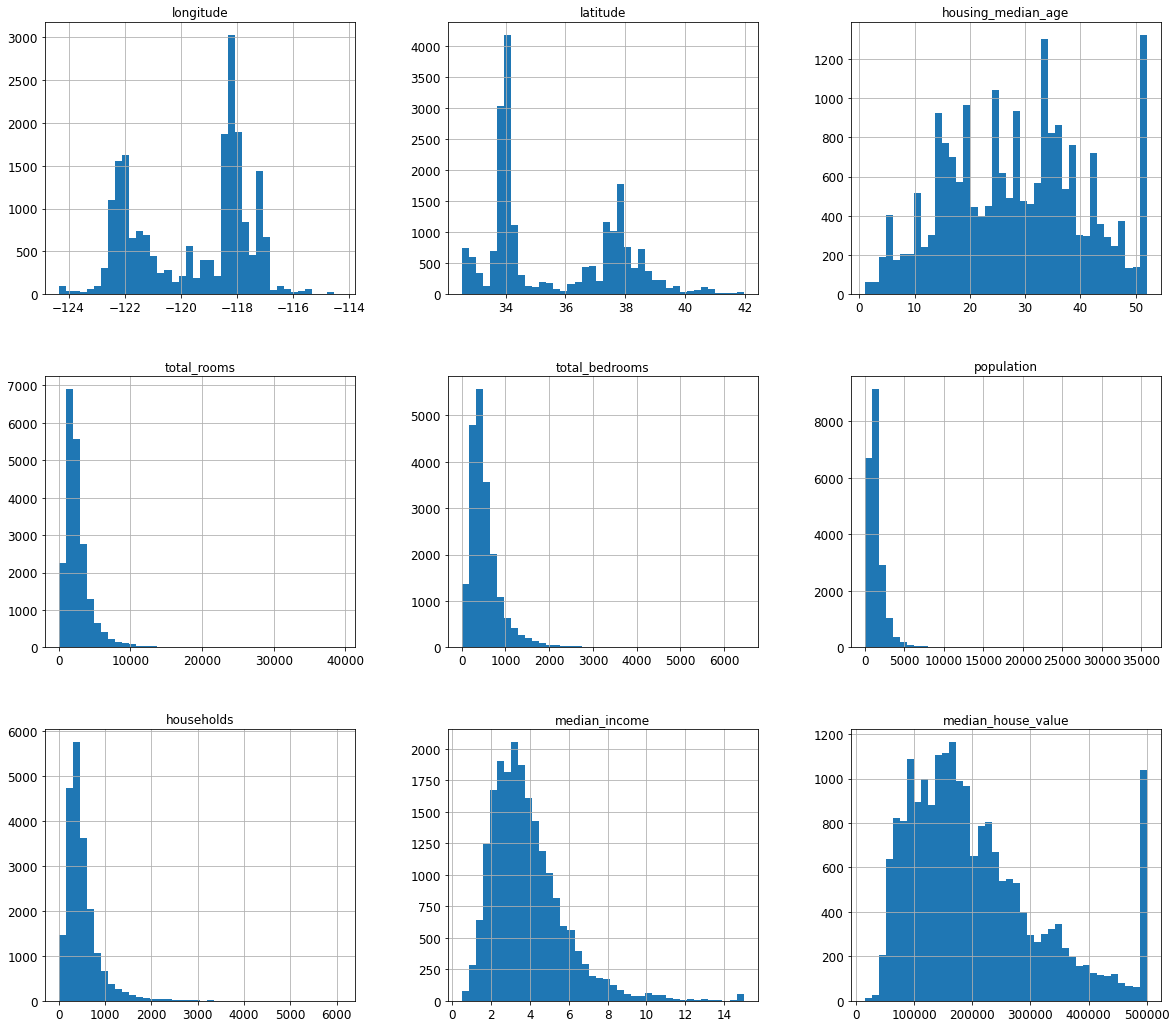

In [17]:
# A histogram of numerical attributes.
housing.hist(bins = 40, figsize=(20,18));

**Comments** 
* The median income is considered a very important feature to the determination of median house values.(**Domain knowledge**)
* Looking at the median income raises the question if whether it is capped.
* If after checking with the team that collected the data, you are told that the data has been scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes, the needed adjustments must be made.
* This will therefore mean, the numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about $30,000). 
* many more people fall between 1 and 6 on the income scale.
*  There are fewer people earning high incomes.
* The housing median age is also capped at 50.

* The median house value also seemed capped at a certain figure of 500,000. This will indicate to the model that, pricing can never go beyond this range, which may be deceptive to the learning and prediction process.

* Most of the features are left tail heavy and this can make it difficult for some machine learning models to detect patterns.

* Tail heavy features need to be transformed(MinMaxScaler or StandardScaler).

The impact of capped values require a further discussion with domain experts to accertain the direction of exploration.

**QUESTIONS**
* To or not to correct skewness?
* To remove outliers or treat outliers?                
    *Recommended to handle outliers first as some models don't perform well with outliers*
* To drop or not to drop a feature?                       
    *Comes after the model training*

These and othere decisions will be taken when the intital training is completed.

**Important**           
  * Before you look at the data any further, you need to create a **test set**, put it aside, and never look at it.
* Check if the label is well distributed by categorizing them.
*The categorization in the above step is run together on train_test_split and stratifiedshufflesplit.*
  * The category with the best distribution of attributes is adopted.
  * If however, the dataset is large, a train_test_split, is usually ideal as it can be well representative of the population.
  * This should be carried in line with the project Objectives.
  

In [18]:
# Finding the numerical attributes
housing_numerical = housing.select_dtypes('number')
housing_numerical.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0


In [19]:
# Default parameter settings
from sklearn.model_selection import KFold
test_size = 0.2
train_set = 0.8
seed = np.random.seed(24)
cv = KFold(n_splits=5, random_state=None, shuffle=False) 

### Categorization        
Before comparing random sampling with stratified shuffle split, a categorization of an important feature is important.      
By this we can appreciate how well the median income(chosen important feature) is distributed accross bins.

 * From the histogram above, does the median_income reflect a fair distribution of the population?
 * No, as it is observed, the distribution is between a concentration of 0.5 and 6. 
 * This is likely to impact the sampling ratios.
 * In the case where the dataset size is small(in thousands and below) care must be taken in splitting to not introduce a **sampling bias**.
 * To reflect this distribution, an attempt is made to split into stratas, where each strata is assumed to fairly represent the population.
 * First, we identify a feature that is very important to predicting the label and which is not fairly distributed(**median income**) and then categorize it into smaller stratas.
 


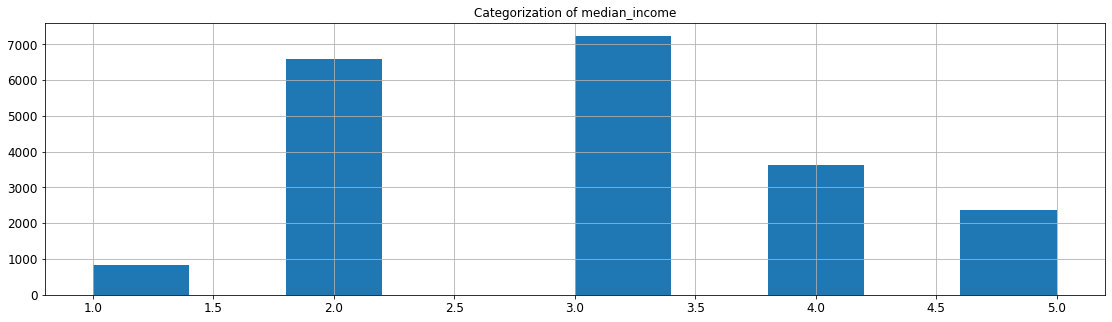

In [20]:
# Creating category distribution of an important feature as disclosed by domain experts
# create a new attribute(income category) in the main dataset.
# Split it into 5 categories
housing["income_category"] = pd.cut(housing["median_income"],
                                    bins = [0., 1.5, 3.0, 4.5, 6, np.inf],
                                    labels=[1, 2, 3, 4, 5])
# Ploting the categorization as a histogram
housing["income_category"].hist(figsize =(19, 5))
plt.title('Categorization of median_income');


**Comment**
* We infere, median income as an important attribute in predicting the label.
* It however, doesn't seem to have a fair value distribution.
* This means, we may suffer a sampling bias.
* A new column to store the income_categorization(strats) is created.
* We split it into small but sufficiently sized representative stratas using pd.cut()
* A stratified split is performed to check the distribution.
* Compare the random split values with the stratified split values.
* The best is adopted as a fair reflection of the sample size.
* The newly created column is droped.

### RANDOM SAMPLING          
* We seek to find out if whether or not the features are at least fairly distributed and a good representation of the population(housing) when random sampling is used.   
* Random sampling however, works well on larger datasets.

In [21]:
# Splitting the dataset using RANDOM SAMPLING.
train_set, test_set = train_test_split(housing, test_size=0.2, random_state= seed)

### STRATIFIED SAMPLING       
* Here, we split the dataset into stratas.
* The goal here is to check if whether or not each strata holds a fair distribution of the population.

In [22]:
# Stratified Random Shuffling Split
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=seed)
for train_index, test_index in split.split(housing, housing["income_category"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

### Comparing the two split methods 

**Random sampling technique**

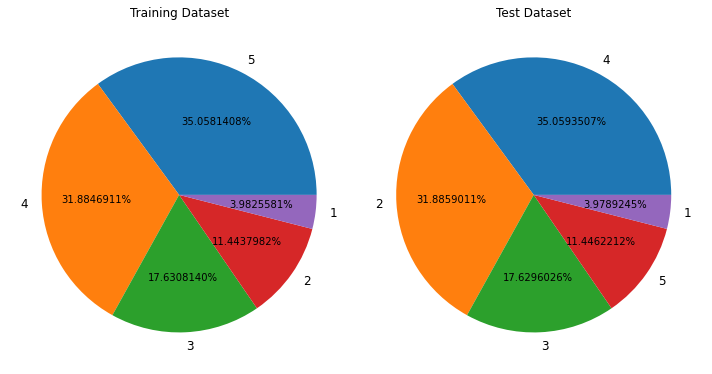

In [23]:
# Plotiing the distribution of features in the train and test sets
plt.figure(figsize=(10,15))

plt.subplot(121)
plt.pie(housing['income_category'].value_counts(),labels=housing['income_category'].unique(),autopct = '%1.7f%%')
plt.title('Training Dataset')

plt.subplot(122)
plt.pie(strat_train_set['income_category'].value_counts(),labels=strat_train_set['income_category'].unique(),autopct = '%1.7f%%')
plt.title('Test Dataset')

plt.tight_layout()

**Stratified shuffle split technique**

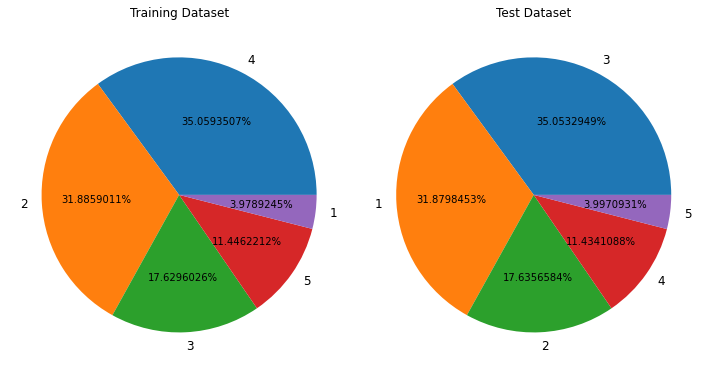

In [24]:
# Using pie chart to explain the distribution of features with the use of Strateifiedshufflesplit.

plt.figure(figsize=(10,15))

plt.subplot(121)
plt.pie(strat_train_set['income_category'].value_counts(), labels=strat_train_set['income_category'].unique(),autopct = '%1.7f%%')
plt.title('Training Dataset')

plt.subplot(122)
plt.pie(strat_test_set['income_category'].value_counts(),labels=strat_test_set['income_category'].unique(),autopct = '%1.7f%%')
plt.title('Test Dataset')

plt.tight_layout();

In [25]:
# # income category generated using the stratefied test set
# strat_test_set["income_category"].value_counts() / len(strat_test_set)

In [26]:
# # Test set generated on income category using the random sampling approach
# strat_train_set['income_category'].value_counts() / len(strat_train_set)
# housing['ocean_proximity'].value_counts()/ len(housing['ocean_proximity'])


In [27]:
# # # Income category generated using the entire dataset
# housing["income_category"].value_counts() / len(housing['income_category'])

In [28]:
# pd.DataFrame({'Overall':housing["income_category"].value_counts() / len(housing['income_category']), 
#               'Stratified': strat_test_set["income_category"].value_counts() / len(strat_test_set),
#               'Random':    strat_train_set['income_category'].value_counts() / len(strat_train_set),
#               'Rand.%Error': (((strat_train_set['income_category'].value_counts() / len(strat_train_set))-(housing["income_category"].value_counts() / len(housing['income_category'])))/(housing["income_category"].value_counts() / len(housing['income_category'])))*100,
#               'Strat.%Error': (((strat_test_set['income_category'].value_counts() / len(strat_test_set['income_category']))-(housing["income_category"].value_counts() / len(housing['income_category'])))/(housing["income_category"].value_counts() / len(housing['income_category'])))*100})

In [29]:
def income_cat_proportions(data):
    return data["income_category"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [30]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


**Comment**    
As you can see, the test set generated using stratified sampling has
income category proportions almost identical to those in the full dataset, whereas the
test set generated using purely random sampling is skewed

* We conclude and adopt stratefied sampling approach as  fairly representative of the distribution.


In [31]:
# Dropping the created income_category attribute in the stratefied sampling, so we can get the original dataset.
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_category", axis=1, inplace=True)

### Exploring the training set
* train_set is named housing, same as the original dataframe.

#### Visualizing the training data to gain further insights

So far we have only taken a quick glance at the data to get a general understanding of the kind of data being manipulated. Now the goal is to go into a little more depth.            
First, make sure you have put the test set aside and you are only exploring the strat_train_set. Also, if the training set is very large, you may want to sample an exploration set, to make manipulations easy and fast.              
In our case, the set is quite small, so you can just work directly on the full set. Let’s create a copy so that you can play with it
without harming the training set:

In [32]:
# Making a copy of the strat_train_set
housing = strat_train_set.copy()

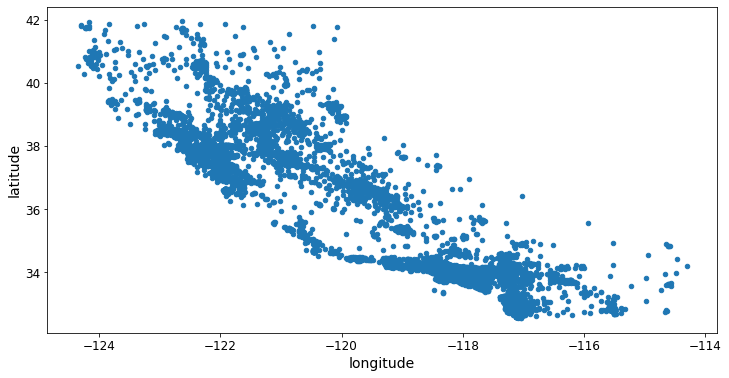

In [33]:
# Location distribution plot
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(12,6));

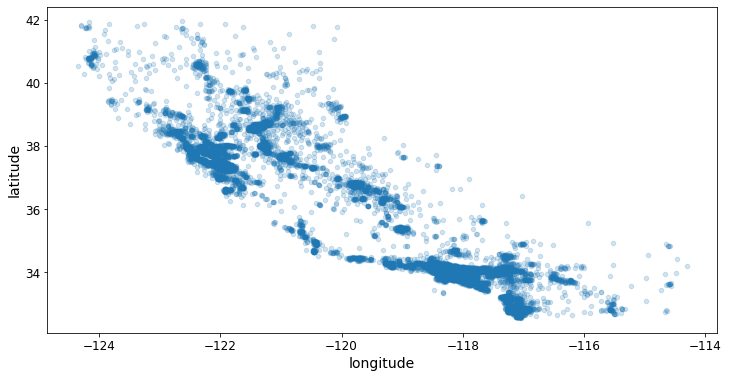

In [34]:
housing.plot(kind = 'scatter', x="longitude", y="latitude", figsize = (12, 6), alpha = .2,);
# Setting the alpha value helps us see areas with high data points

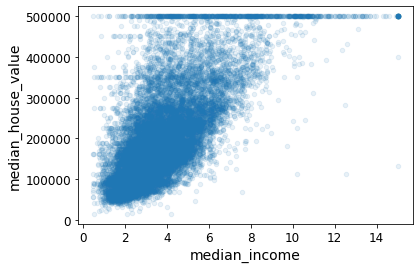

In [35]:
# 
housing.plot(kind = 'scatter', x='median_income', y='median_house_value', alpha = 0.1);

<AxesSubplot:xlabel='population', ylabel='median_income'>

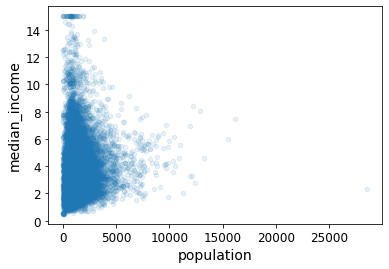

In [36]:
housing.plot(kind='scatter', x='population', y = 'median_income', alpha=0.1)

**Visualizing Geographical Data**           
We'd visualize this just because we have lattitude and longitude data.

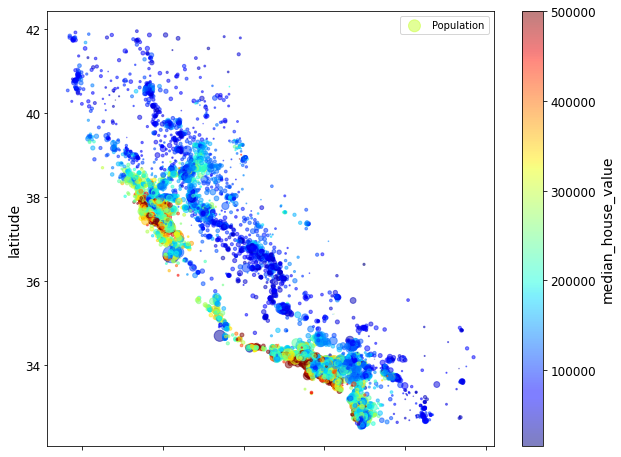

In [37]:
# Lets visualize distribution in an area, comparing the population with the median house prices.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
             s=housing["population"]/100, c = "median_house_value", 
             label="Population", figsize=(10,8),
             cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend();

In [38]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

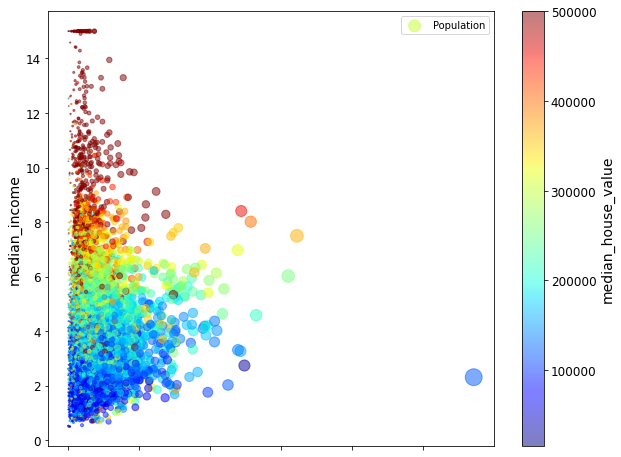

In [39]:
# Lets visualize distribution in an area, comparing the population with the median house prices.
housing.plot(kind="scatter", x="population", y="median_income", alpha=0.5,
             s=housing["population"]/100, c = "median_house_value", 
             label="Population", figsize=(10,8),
             cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend();

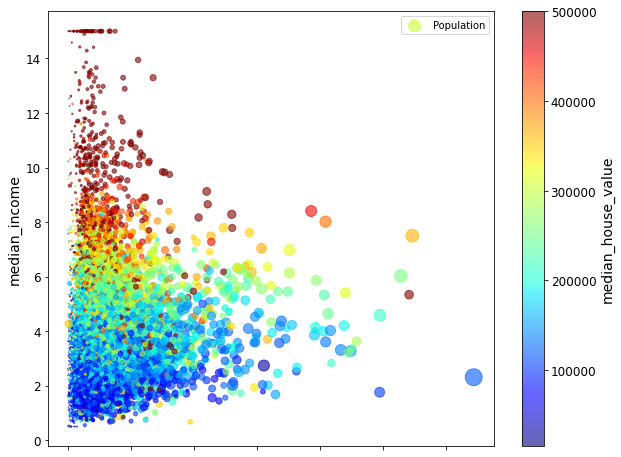

In [40]:
# Lets visualize distribution in an area, comparing the population with the median house prices.
housing.plot(kind="scatter", x="total_bedrooms", y="median_income", alpha=0.6,
             s=housing["population"]/100, c = "median_house_value", 
             label="Population", figsize=(10,8),
             cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend();

**Attribute Combination**   
It may be important to try creating new attributed that may have more meaning in helping one make a good prediction. Some attributes may on their own not make much meaning to when they are combined with other. This may, in most instances boost the correlation values.

In [41]:
housing.columns.value_counts().sum()

10

In [42]:
# housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
# housing['median_income_per_household'] = housing['median_income']/ housing['households']




housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

### Correlation checks
Here, we determine the linear relationship between each attribute annotated in numbers

In [43]:
def correlation_matrix(data):
    fig, ax = plt.subplots(figsize=(15,5))
    matrix_cor = sns.heatmap(data.corr(method = 'pearson'), annot=True, center=2, annot_kws={'size':15}, linecolor='red', linewidths='0.5', xticklabels=True, yticklabels=True)
    plt.xticks(rotation = '90')
    matrix_cor.invert_xaxis()
    
    return matrix_cor
    

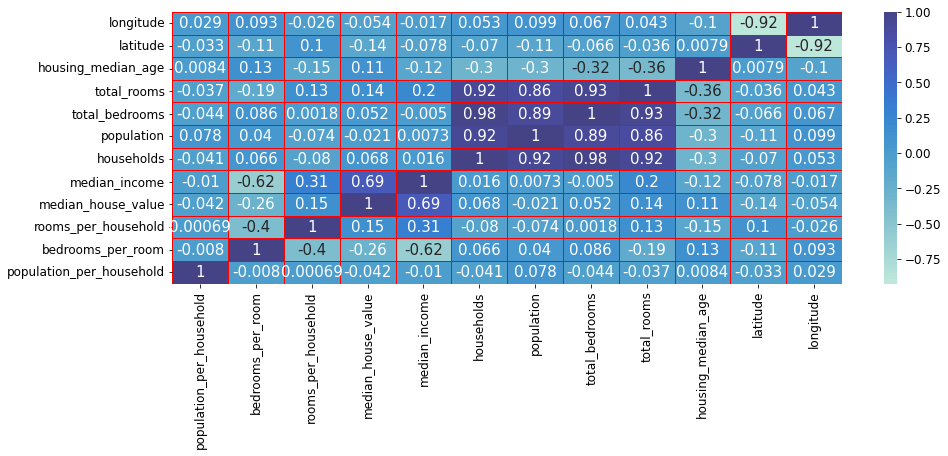

In [44]:
correlation_matrix(housing);

In [45]:
corr_matrix = housing.corr() # Obtains correlation between all features
corr_matrix['median_house_value'].sort_values(ascending=False) # Compares label with other attributes

median_house_value          1.000000
median_income               0.687682
rooms_per_household         0.149720
total_rooms                 0.141185
housing_median_age          0.107082
households                  0.068052
total_bedrooms              0.052021
population                 -0.021162
population_per_household   -0.041561
longitude                  -0.053548
latitude                   -0.136318
bedrooms_per_room          -0.264449
Name: median_house_value, dtype: float64

## Experimenting with Attribute Combinations


In [46]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
housing['median_income_per_household'] = housing['median_income']/housing['households']

In [47]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value             1.000000
median_income                  0.687682
rooms_per_household            0.149720
total_rooms                    0.141185
housing_median_age             0.107082
median_income_per_household    0.082826
households                     0.068052
total_bedrooms                 0.052021
population                    -0.021162
population_per_household      -0.041561
longitude                     -0.053548
latitude                      -0.136318
bedrooms_per_room             -0.264449
Name: median_house_value, dtype: float64

(0.0, 5.0, 0.0, 520000.0)

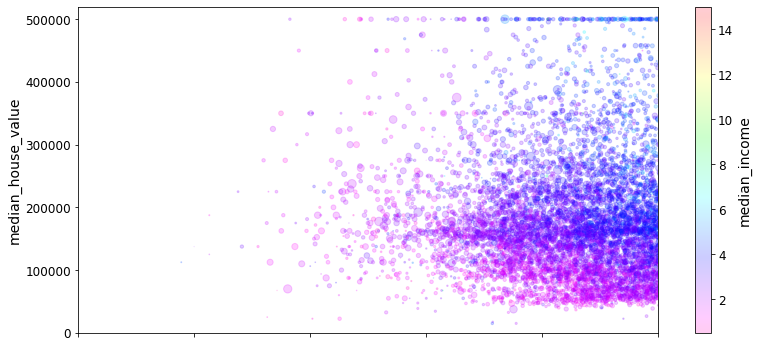

In [48]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             s = housing['population']/100, c = 'median_income',cmap='gist_rainbow_r',
             alpha=0.2, figsize=(13,6))
plt.axis([0, 5, 0, 520000])
# plt.show()

In [49]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,median_income_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16342.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16342.000000,16512.000000,16512.000000
mean,-119.569073,35.628505,28.621609,2627.565589,535.569147,1419.049297,497.470082,3.870516,207329.353258,5.438798,0.212802,2.979886,0.015157
std,2.005132,2.133516,12.580367,2159.141915,416.820533,1103.647396,378.503490,1.904863,115810.816884,2.575736,0.057342,4.093905,0.058020
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.888889,0.100000,0.692308,0.000380
25%,-121.800000,33.930000,18.000000,1442.000000,295.000000,783.000000,278.000000,2.563550,119400.000000,4.444707,0.175373,2.428945,0.005043
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1162.000000,409.000000,3.534300,179500.000000,5.232422,0.203075,2.817672,0.008491
75%,-118.000000,37.710000,37.000000,3141.000000,647.000000,1724.000000,605.000000,4.743250,265700.000000,6.058310,0.239576,3.279599,0.014210
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,502.461538,3.750025


## Outlier check and handling


#### Check for outliers

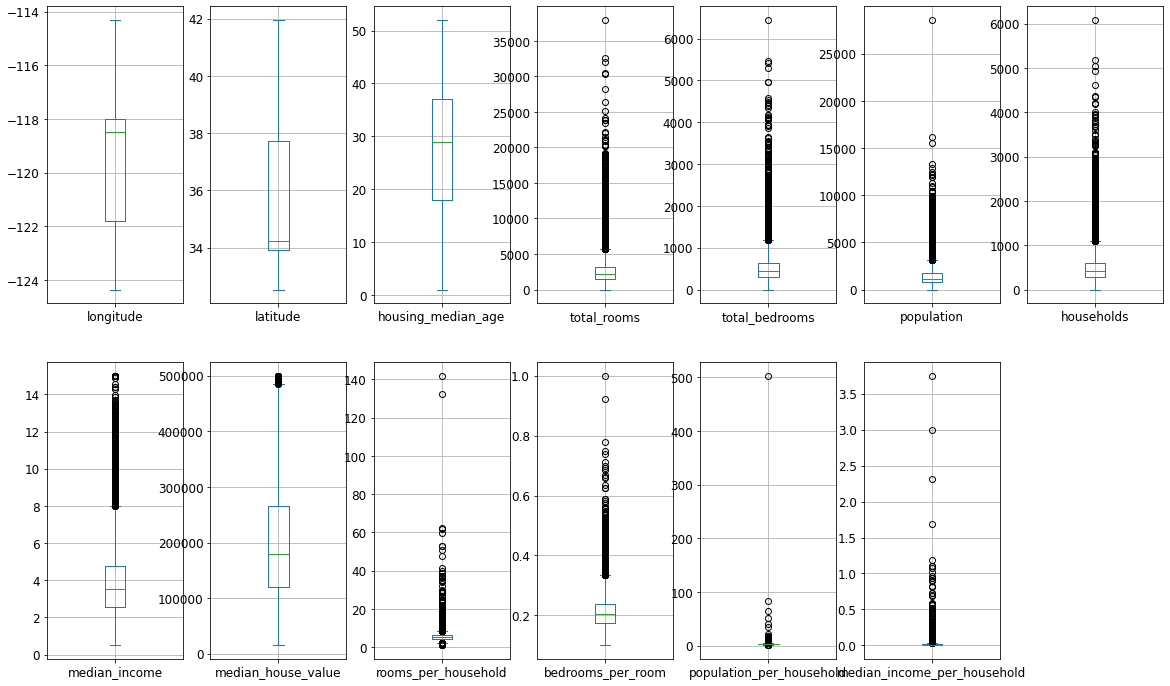

In [50]:
# Box plot to check for outliers
housing.plot(kind = 'box', subplots = True, layout=(2,7), figsize = (20,12), grid= True);

1. total_rooms, total_bedrooms, population, households, meadian_income and median house value have outliers.

### Winsorization   
When we remove outliers, we want to be careful that we are not throwing away measurements just because they look strange. They may be the result of actual phenomenon that we should further investigate. When removing outliers, one must endeavor to be as conservative as possible, using the definition of an extreme outlier:

In [51]:
# from scipy.stats import mstats
# housing['population'] = mstats.winsorize(housing['population'], limits=[0.07, 0.07], inclusive=[True, True], inplace=True)
# housing['total_rooms'] = mstats.winsorize(housing['total_rooms'], limits=[0.07,0.07], inclusive=[True, True], inplace= True)
# housing['total_bedrooms'] = mstats.winsorize(housing['total_bedrooms'], limits=[0.07,0.07], inclusive=[True, True], inplace= True)
# housing['households'] = mstats.winsorize(housing['households'], limits=[0.06,0.06], inclusive=[True, True], inplace= True)
# housing['median_income'] = mstats.winsorize(housing['median_income'], limits=[0.04,0.04], inclusive=[True, True], inplace= True)
# housing['rooms_per_household'] = mstats.winsorize(housing['rooms_per_household'], limits=[0.04,0.04], inclusive=[True, True], inplace= True)
# housing['bedrooms_per_room'] = mstats.winsorize(housing['bedrooms_per_room'], limits=[0.04,0.04], inclusive=[True, True], inplace= True)
# # housing['median_income_per_household'] = mstats.winsorize(housing['median_income_per_household'], limits=[0.08,0.08], inclusive=[True, True], inplace= True)
# housing['population_per_household'] = mstats.winsorize(housing['population_per_household'], limits=[0.04,0.04], inclusive=[True, True], inplace= True)

In [52]:
# # Box plot to check for outliers after winsorization
# housing.plot(kind = 'box', subplots = True, layout=(2,6), figsize = (20,12), grid= True);

In [53]:
# corr_matrix = housing.corr()
# corr_matrix['median_house_value'].sort_values(ascending=False)

#### VIF Test

In [54]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# # Create a copy of the original DataFrame
# vif_data = housing.copy()

# # Drop the target feature from the DataFrame
# vif_data_1 = vif_data.drop(['median_house_value', 'ocean_proximity'], axis =1)
# # vif_data_1 = vif_data

# # vif_data_1

In [55]:
# # Calculating the VIF

# def calc_vif(X):

#     vif = pd.DataFrame()
#     vif["variables"] = X.columns
#     vif["VIF"] = [variance_inflation_factor(
#         X.values, i) for i in range(X.shape[1])]

#     return(vif)


# X = vif_data_1.iloc[:, :]

# calc_vif(X)

In [56]:
# # Drop the target feature from the DataFrame
# vif_data_2 = vif_data_1.drop(['longitude','latitude', 'households'], axis =1)
# # vif_data_2

In [57]:
# # Calculating the VIF

# def calc_vif(X):

#     vif = pd.DataFrame()
#     vif["variables"] = X.columns
#     vif["VIF"] = [variance_inflation_factor(
#         X.values, i) for i in range(X.shape[1])]

#     return(vif)


# # X = vif_data_2.iloc[:, :]
# X = vif_data_2

# calc_vif(X)

#### Collinearity check

In [58]:
# # Function to list features that are correlated
# # Adds the first of the correlated pair only (not both)
# def correlatedFeatures(dataset, threshold):
#     correlated_columns = set()
#     correlations = dataset.corr()
#     for i in range(len(correlations)):
#         for j in range(i):
#             if abs(correlations.iloc[i,j]) > threshold:
#                 correlated_columns.add(correlations.columns[i])
#     return correlated_columns

# # Get a set of correlated features, based on threshold correlation of 0.85
# cf = correlatedFeatures(housing.drop('median_house_value', axis = 1), 0.70)
# cf

In [59]:
# # Removes the correlated features
# non_correlated = housing.drop(cf, axis=1) # This removes the correlated features and maintains  the non-correlated features.
# # non_correlated.columns.value_counts().sum()
# non_correlated.head(2)
# # X_train = X_train.drop(cf, axis=1)
# # X_test = X_test.drop(cf, axis=1)

In [60]:
# # Drops the correlated attributes in the dataset
# data_after_droping_correlated_attributes = housing.drop(columns=non_correlated.columns, axis=1)
# data_after_droping_correlated_attributes.head(2)

In [61]:
# fig, ax = plt.subplots(figsize = (15,8))
# cor_matrix = sns.heatmap(non_correlated.corr(method='pearson'), annot=True, cmap='twilight',center=True)
# cor_matrix.invert_xaxis()
# plt.xticks(rotation = 90);

#### Correlation matrix of all features included the re-engineered features.**

In [62]:
# fig, ax = plt.subplots(figsize = (15,6))
# cor_matrix = sns.heatmap(housing.corr(method='pearson'), annot=True, cmap='twilight',center=True)
# cor_matrix.invert_xaxis()
# plt.xticks(rotation = 90);

In [63]:
# # Obtaining the correlation figures after feature engineering.
# corr_matrix = housing.corr()
# corr_matrix['median_house_value'].sort_values(ascending=False)

## Data Cleaning**               
* We saw earlier that the total_bedrooms attribute has some missing values and since most machine learning algorithms don't work well on missing numbers, we'd create a function to handle same.

### Preparing the Data for Machine Learning Algorithms   
 * Missing values to be fixed using the simpleimputer module which only work on numerical values. (*A Recommended method to fill missing values in large datasets*).
 

In [64]:
# housing_training = X.copy()

In [65]:
housing.columns.value_counts().sum()

14

In [66]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_income_per_household
16842,-122.45,37.63,28.0,4946.0,848.0,2683.0,824.0,5.7480,302100.0,NEAR OCEAN,6.002427,0.171452,3.256068,0.006976
1714,-122.33,38.00,35.0,3779.0,711.0,2493.0,679.0,2.9781,109000.0,NEAR BAY,5.565538,0.188145,3.671576,0.004386


In [67]:
# housing = non_correlated.copy()

In [68]:
housing = strat_train_set.copy()  #Here, we revert to the original dataset

In [69]:
# Independent variable
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
# Dependent variable
housing_labels = strat_train_set["median_house_value"].copy()

In [70]:
# # Independent features (X)

# housing_labels = housing["median_house_value"]
# # housing_labels = housing_training["median_house_value"].copy() 

# # Dependent Features (y)

In [71]:
# # Creating the dependent and iheadependent features from the strat_train_set
# housing = housing.drop("median_house_value", axis=1)
# # housing_independent_features = housing_training.drop("median_house_value", axis=1).copy() 



In [72]:
# housing_independent_features.shape
housing.shape

(16512, 9)

In [73]:
# Extracting the Numerical features
# housing_numericals = housing_independent_features.select_dtypes('number')
housing_numericals = housing.select_dtypes('number')

# Extracting the Categorical features
# housing_categorical = housing_independent_features.select_dtypes('object')
housing_categorical = housing.select_dtypes('object')


# Creating a list of  numerical attributes 
numerical_attributes = list(housing_numericals)
# Creating a list of categorical attributes
categorical_attributes = list(housing_categorical)

### Feature Scaling

One of the most important transformations you need to apply to your data is featurescaling. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Note that scaling the target values is generally not required         
There are two common ways to get all attributes to have the same scale:           
   * **MinMaxScaler**              
   * **StandardScaler**.

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [75]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16842,-122.45,37.63,28.0,4946.0,848.0,2683.0,824.0,5.7480,NEAR OCEAN
1714,-122.33,38.00,35.0,3779.0,711.0,2493.0,679.0,2.9781,NEAR BAY
3672,-118.41,34.21,35.0,1789.0,292.0,897.0,267.0,5.5920,<1H OCEAN
8041,-118.16,33.84,36.0,2444.0,432.0,1199.0,424.0,4.1538,<1H OCEAN
10015,-121.20,39.25,5.0,906.0,144.0,376.0,141.0,4.3523,INLAND


In [76]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [77]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

In [78]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
16842,-122.45,37.63,28.0,4946.0,848.0,2683.0,824.0,5.748,NEAR OCEAN,6.002427,3.256068
1714,-122.33,38.0,35.0,3779.0,711.0,2493.0,679.0,2.9781,NEAR BAY,5.565538,3.671576
3672,-118.41,34.21,35.0,1789.0,292.0,897.0,267.0,5.592,<1H OCEAN,6.700375,3.359551
8041,-118.16,33.84,36.0,2444.0,432.0,1199.0,424.0,4.1538,<1H OCEAN,5.764151,2.82783
10015,-121.2,39.25,5.0,906.0,144.0,376.0,141.0,4.3523,INLAND,6.425532,2.666667


In [79]:
# housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
# housing["population_per_household"]=housing["population"]/housing["households"]
housing['median_income_per_household'] = housing['median_income']/housing['households']

In [80]:
# Create a pipeline for numerical features.
num_pipeline = Pipeline(steps=[('Imputer', SimpleImputer(strategy='median')),
                               ('attribs_adder', CombinedAttributesAdder()),
                               ('Std_Scaler', StandardScaler())
                              ])
housing_num_tr = num_pipeline.fit_transform(housing_numericals)

**Handling Numerical and Column Attributes Simultaneously in a pipeline**

In [81]:
# Creating a full pipeline for the numerical and categorical attributes.

full_pipeline = ColumnTransformer([
                                   ('numerical',   num_pipeline, numerical_attributes),
                                   ('categorical', OneHotEncoder(), categorical_attributes)
                                  ])

housing_prepared = full_pipeline.fit_transform(housing);  

In [82]:
housing_prepared.shape

(16512, 16)

In [83]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [84]:
# let's try the full preprocessing pipeline on a few training instances
from sklearn.metrics import mean_squared_error
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)


print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [307091.79903632 173928.78700064 283304.77878663 239708.57235482
 112701.98588468]


In [85]:
some_data_predictions = lin_reg.predict(some_data_prepared)
some_data_mse = mean_squared_error(some_labels, some_data_predictions)
some_data_rmse = np.sqrt(some_data_mse)
some_data_rmse

49521.225335774136

In [86]:
print("Labels:", list(some_labels))


Labels: [302100.0, 109000.0, 239900.0, 218800.0, 188200.0]


In [87]:
# some_data_prepared

In [88]:
X_train = housing_prepared.copy()
y_train = housing_labels.copy()
#These are from housing_training = the strat_train_set.copy()

### Select and Train a Model**            
At last! the proble is defined, collected and analyzed the data, sampled a training and test set, and created transformation pipelines to automatically clean and prepare the data for Machine Learning algorithms. Now we choose and train a Machine Learning model.


In [89]:
# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVR

# Model evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Formating the print statement
from pprint import pprint

# Transforming the label
from sklearn.compose import TransformedTargetRegressor

In [90]:
# Slicing the strat_train set into bits
some_data = housing.iloc[:5] # X
some_labels = housing_labels.iloc[:5] # y
same_data_prepared = full_pipeline.fit_transform(some_data) # transform the train data 

In [91]:
# A pipeline 
full_pipeline_with_predictor = Pipeline([
                                        ("preparation", full_pipeline),
                                        ("linear", LinearRegression())
                                       ])

full_pipeline_with_predictor.fit(housing, housing_labels)
# full_pipeline_with_predictor.score(same_data_prepared, some_labels)
full_pipeline_with_predictor.predict(some_data)
full_pipeline_with_predictor.score(housing, housing_labels)

0.6528500334458712

In [92]:
from sklearn.model_selection import KFold
seed = 42
scoring = 'neg_mean_squared_error'
scoring_r2 = 'r2'
cv = KFold(n_splits=5, shuffle=True, random_state=seed)

### Training and evaluating models with Crossvalidation on train set

In [93]:
# A cross validattion function to compute the error scores
def training_with_cross_val_score(name,model, X, y):
    reg = model()
    scores= cross_val_score(estimator=reg, scoring=scoring, X=X, y=y, cv=cv, n_jobs=None, verbose = False)
    reg_score_mean = scores.mean()
    reg_score_std = scores.std()
    reg_rmse = np.sqrt(-scores)
    print('——————————————————————————————————————————————————————')

    
    print(name, 'CV_Mean :', reg_rmse.mean())
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    return(reg_rmse)

In [94]:
print('crossvalscore results')
# Listing models to try
# modelx = [LinearRegression, DecisionTreeRegressor, SVR, GradientBoostingRegressor, XGBRegressor, 
#           XGBRFRegressor, ExtraTreeRegressor,KNeighborsRegressor, RandomForestRegressor, Lasso, Ridge]
modelx = [LinearRegression, DecisionTreeRegressor, SVR, GradientBoostingRegressor, XGBRegressor, 
          XGBRFRegressor, ExtraTreeRegressor,KNeighborsRegressor, RandomForestRegressor, Lasso, Ridge]

for model in modelx:
    training_with_cross_val_score(name=model.__name__, model=model, X=X_train, y=y_train)

crossvalscore results
——————————————————————————————————————————————————————
LinearRegression CV_Mean : 68960.96138250236
Mean: -4757872682.378667
Standard deviation: 207981865.13823962
——————————————————————————————————————————————————————
DecisionTreeRegressor CV_Mean : 71945.9862037869
Mean: -5177867992.303513
Standard deviation: 184622365.76995638
——————————————————————————————————————————————————————
SVR CV_Mean : 118756.20650893092
Mean: -14107526485.925842
Standard deviation: 505692487.31679803
——————————————————————————————————————————————————————
GradientBoostingRegressor CV_Mean : 53513.996966223596
Mean: -2864861837.4910727
Standard deviation: 112859544.02883792
——————————————————————————————————————————————————————
XGBRegressor CV_Mean : 48056.6789173232
Mean: -2309789702.8005767
Standard deviation: 56194279.99744049
——————————————————————————————————————————————————————
XGBRFRegressor CV_Mean : 60344.8776844645
Mean: -3643238935.451059
Standard deviation: 158908524.5607385

### Training and evaluating models using GridSearch and TransformedTargetRegressor       
This is useful in appying a non linear transformation on the label.

In [95]:
# def model_training_with_gridsearchcv_and_transformed_target_reg(name, model, X, y):
#     grid = GridSearchCV(TransformedTargetRegressor(regressor=model, func=np.log, inverse_func=np.exp,check_inverse=True),
#                         param_grid={}, scoring=scoring, cv=cv, return_train_score=True,verbose=0, n_jobs=None)                         
#     grid.fit(X, y)
#     # predictions = grid.predict(X)
#     grid_score = grid.cv_results_['mean_train_score']
#     grid_rmse = np.sqrt(-grid_score)
#     # grid_score = grid.best_estimator_.score(X, y)
#     print(name,grid_rmse)
#     return grid_score;

In [96]:
    # models = [LinearRegression(), DecisionTreeRegressor(random_state=seed), SVR(), GradientBoostingRegressor(random_state=seed),         XGBRegressor(), XGBRFRegressor(), ExtraTreeRegressor(random_state=seed),KNeighborsRegressor(), RandomForestRegressor(random_state=seed), Lasso(), Ridge()]

    # for model in models:
    #     model_training_with_gridsearchcv_and_transformed_target_reg(name=model.__class__.__name__, model=model, X=X_train, y=y_train);

### Training and avaluating models with Gridsearch using train set**

In [97]:
# def model_training_with_gridsearchcv(name, model, X, y):
#     grid = GridSearchCV(estimator=model, param_grid={}, scoring=scoring, cv=cv, return_train_score=True,verbose=0, n_jobs=None)                         
#     grid.fit(X, y)
#     # predictions = grid.predict(X)
#     grid_score = grid.cv_results_['mean_train_score']
#     grid_rmse = np.sqrt(-grid_score)
#     # grid_score = grid.best_estimator_.score(X, y)
#     print('——————————————————————————————————————————————————————')

#     print(name, grid_rmse)
#     print('GridCVMean: ', grid_score)
#     return grid_score;

In [98]:
# models = [XGBRegressor(), RandomForestRegressor(random_state=seed)]

# for model in models:
#     model_training_with_gridsearchcv(name=model.__class__.__name__, model=model, X=X_train, y=y_train);
    

In [99]:
# def model_training_with_gridsearchcv(name, model, X, y):
#     grid = GridSearchCV(estimator=model, param_grid={}, scoring='r2', cv=cv, return_train_score=True,verbose=0, n_jobs=None)                         
#     grid.fit(X, y)
#     # predictions = grid.predict(X)
#     grid_score = grid.cv_results_['mean_train_score']
#     # grid_rmse = np.sqrt(-grid_score)
#     # grid_score = grid.best_estimator_.score(X, y)
#     print(name, grid_score)
#     return grid_score;

In [100]:
# models = [LinearRegression(), DecisionTreeRegressor(random_state=seed), SVR(), GradientBoostingRegressor(random_state=seed),         XGBRegressor(), XGBRFRegressor(), ExtraTreeRegressor(random_state=seed),KNeighborsRegressor(), RandomForestRegressor(random_state=seed), Lasso(), Ridge()]

# for model in models:
#     model_training_with_gridsearchcv(name=model.__class__.__name__, model=model, X=X_train, y=y_train);

In [101]:
# Feature importance
from yellowbrick.model_selection import FeatureImportances
def feature_importance(model_name, X, y):
    model = model_name()
    viz = FeatureImportances(model)
    viz.fit(X, y)
    viz.show()
    return feature_importance

# Based on similar results, inflation(%) is dropped.

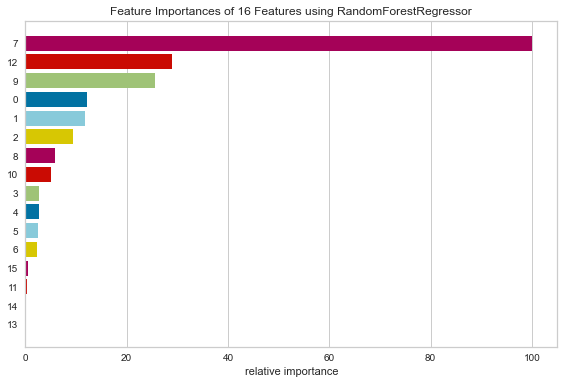

In [102]:
model_list = [RandomForestRegressor]
for model_name in model_list:
    feature_importance(model_name=model_name, X=X_train, y=y_train)

#### Next steps
* Outlier check(**Done**)
* Skewness
* missing values(**Done in the pipeline**)
* feature engineering
* multicollinearity check
* VIF test

### Randomized Search


In [103]:
from scipy.stats import randint

# Number of trees used in the boosting process
n_estimators = randint(low=100, high=1000)

# Maximum depth of each tree
max_depth = [int(x) for x in np.linspace(20, 30, 15)]
max_depth.append(None)

# Minimum number of samples per leaf
min_samples_leaf = randint(low=1, high=5)

# Minimum number of samples to split a node
min_samples_split = [int(x) for x in np.arange(2, 6, 2)]

# Maximum number of features to consider for making splits
max_features = [int(x) for x in np.arange(1,13,1)]

bootstrap = [False]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features,
                       # 'min_impurity_decrease': min_impurity_decrease,
                       'bootstrap': bootstrap
                      }

In [104]:
# Use the random grid to search to find optimal hyperparameters
# First create the baseline model to tune
rf = RandomForestRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=hyperparameter_grid,
                               n_iter=15,
                               scoring=scoring,
                               cv=cv,
                               verbose=1,
                               random_state=seed,
                               n_jobs=None,
                               return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(), n_iter=15,
                   param_distributions={'bootstrap': [False],
                                        'max_depth': [20, 20, 21, 22, 22, 23,
                                                      24, 25, 25, 26, 27, 27,
                                                      28, 29, 30, None],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029132C9C340>,
                                        'min_samples_split': [2, 4],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029132FE6220>},
                   random_state=42, return_train_score=True,
                   

In [105]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 24,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 373}

Scikit-learn uses the negative mean absolute error for evaluation because it wants a metric to maximize. Therefore, a better score will be closer to 0. We can get the results of the randomized search into a dataframe, and sort the values by performance.


In [106]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(rf_random.cv_results_).sort_values('mean_test_score', ascending = False)

# random_results.head(10)

In [107]:
# outputs the best estimator for the prediction
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=24, max_features=5,
                      n_estimators=373)

**Evaluation Function**     

*To determine if random search yielded a better model, we compare the base model with the best random search model.*

**Set and evaluate Baseline Model**

In [108]:
# Evaluates the baseline model against the randomized search
base_model = RandomForestRegressor(n_estimators=100, random_state=seed, verbose=0)
base_model.fit(X_train, y_train)
base_accuracy = base_model.score(X_train, y_train)

print('Model train score = ', round(base_accuracy*100,3),'%')

Model train score =  97.371 %


**Evaluate the Random Search Model**

In [109]:
# Randomizedsearch model
best_random = rf_random.best_estimator_
best_random = rf_random.best_estimator_.score(X_train, y_train)
print('Score_random_search = ', round(best_random,3)*100,'%')

Score_random_search =  100.0 %


In [110]:
pprint(rf_random.best_estimator_)

RandomForestRegressor(bootstrap=False, max_depth=24, max_features=5,
                      n_estimators=373)


In [111]:
print('Improvement of {:0.2f}%.'.format(
    100 * (best_random - base_accuracy) / base_accuracy))

Improvement of 2.69%.


In [112]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=24, max_features=5,
                      n_estimators=373)

### GridSearch

In [126]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': [221],
                       'max_depth': [int(x) for x in np.arange(20, 25, 5)],
                       'min_samples_leaf': [int(x) for x in np.arange(1, 3, 1)],
                       'min_samples_split': [int(x) for x in np.arange(2, 4, 2)],
                       'max_features': [int(x) for x in np.arange(13, 15, 2)],
                       # 'min_impurity_decrease': min_impurity_decrease,
                       'bootstrap': [False]
                      }

In [127]:
grid_search_model = RandomForestRegressor()


In [128]:
grid_search_model = GridSearchCV(estimator=grid_search_model, param_grid=hyperparameter_grid, cv=cv, return_train_score=True, n_jobs=None, verbose=1)


In [129]:
grid_search_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [False], 'max_depth': [20],
                         'max_features': [13], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2], 'n_estimators': [221]},
             return_train_score=True, verbose=1)

In [130]:
grid_search_model.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 13,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 221}

In [131]:
grid_search_model.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=20, max_features=13,
                      min_samples_leaf=2, n_estimators=221)

In [132]:
# cvres = grid_search_model.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(np.sqrt(-mean_score), params)

In [185]:
best_grid1 = grid_search_model.best_estimator_.score(X_train, y_train)
best_grid1

0.9920916833633521

In [186]:
type(best_grid1)

numpy.float64

In [187]:
print('Improvement of {:0.2f}%.'.format(
    100 * (best_grid1 - base_accuracy) / base_accuracy))

Improvement of 1.89%.


### Analyzing best models and their errors 

In [ ]:
col = grid_search_model.columns

In [ ]:

feature_importances = grid_search_model.best_estimator_.feature_importances_
pd.DataFrame(feature_importances)

### Feature importance scores next to their corresponding attribute names:


In [ ]:
# extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"] # Engineered features
# cat_encoder = full_pipeline.named_transformers_["cat"]
# cat_one_hot_attribs = list(cat_encoder.categories_[0])
# attributes = num_attribs + extra_attribs + cat_one_hot_attribs
# sorted(zip(feature_importances, attributes), reverse=True)

With this information, you may want to try dropping some of the less useful features
(e.g., apparently only one ocean_proximity category is really useful, so you could try
dropping the others).
You should also look at the specific errors that your system makes, then try to under‐
stand why it makes them and what could fix the problem (adding extra features or
getting rid of uninformative ones, cleaning up outliers, etc.)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

from yellowbrick.model_selection import FeatureImportances

model = RandomForestRegressor(n_estimators=600, random_state = seed)
viz = FeatureImportances(model)
viz.fit(X_train, y_train)
viz.show()

In [161]:
final_model = grid_search_model.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_score = final_model.score(X_test_prepared, y_test)
final_score

0.8183873745488109

In [152]:
y_test = strat_test_set['median_house_value'].copy()
# y_test

In [153]:
X_test = strat_test_set.drop('median_house_value', axis=1)

In [154]:
final_model = grid_search_model.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
# X_test_prepared = full_pipeline.transform(X_test)

In [155]:
def test_predictions(Xdata, ydata):
    X_test_prepared = full_pipeline.transform(Xdata)
    final_predictions = grid_search.best_estimator_.predict(X_test_prepared)
    final_mse = mean_squared_error(ydata, final_predictions)
    final_rmse = np.sqrt(-final_mse)
    final_r2_score = grid_search.best_estimator_.score(X_test_prepared)
    
    print(final_rmse, final_r2_score)
    return final_rmse



In [ ]:
# Extracting the Numerical features
# housing_numericals = housing_independent_features.select_dtypes('number')
housing_numericals = strat_test_set.select_dtypes('number')

# Extracting the Categorical features
# housing_categorical = housing_independent_features.select_dtypes('object')
housing_categorical = strat_test_set.select_dtypes('object')


# Creating a list of  numerical attributes 
numerical_attributes = list(housing_numericals)
# Creating a list of categorical attributes
categorical_attributes = list(housing_categorical)

In [ ]:
# Create a pipeline for numerical features.
num_pipeline_test = Pipeline(steps=[('Imputer', SimpleImputer(strategy='median')),
                                    ('Std_Scaler', StandardScaler())
                              ])
housing_num_tr_test = num_pipeline.fit_transform(housing_numericals)

In [ ]:
# Creating a full pipeline for the numerical and categorical attributes.

full_pipeline = ColumnTransformer([
                                   ('numerical',   num_pipeline, numerical_attributes),
                                   ('categorical', OneHotEncoder(), categorical_attributes)
                                  ])



In [ ]:
housing_prepared = full_pipeline.transform(X_test);  

In [ ]:
# Regression Evaluation Imports

from sklearn.ensemble import RandomForestRegressor

from yellowbrick.regressor import PredictionError, ResidualsPlot

In [ ]:
# Instantiate the linear model and visualizer
model = RandomForestRegressor(n_estimators=600, random_state = seed)
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [ ]:
# Prediction plots
# Use plotly

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder

**Handling Numerical and Column Attributes Simultaneously in a pipeline**

In [ ]:
housing_prepared.shape